In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
water = pd.read_csv('Daily_Water_Intake.csv')
water.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


In [3]:
water.shape

(30000, 7)

In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [5]:
print('Duplicate Values', water.duplicated().sum())

Duplicate Values 338


In [6]:
# Now Remove the duplicate values
water.drop_duplicates(inplace=True)

In [7]:
water.shape

(29662, 7)

In [8]:
water.isnull().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

In [9]:
water.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


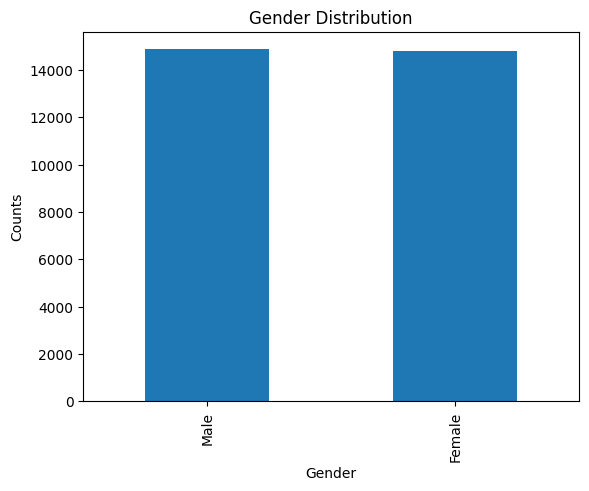

In [10]:
water['Gender'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.title('Gender Distribution')
plt.show()

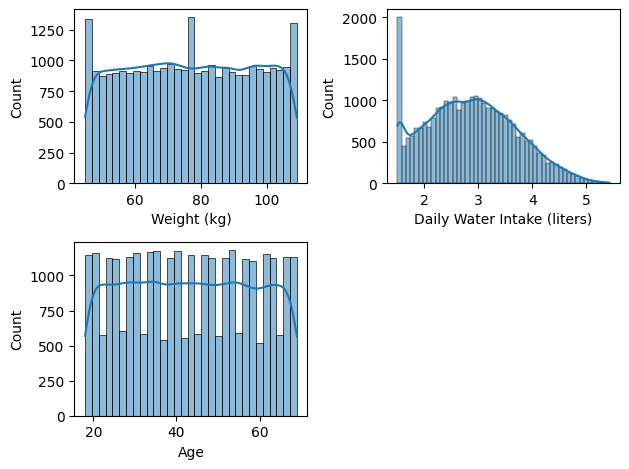

In [11]:
# Plot 1
plt.subplot(2,2,1)
sns.histplot(data=water, x="Weight (kg)", kde=True)
plt.subplot(2,2,2)

# Plot 2
sns.histplot(data=water, x="Daily Water Intake (liters)", kde=True)
plt.subplot(2,2,3)
sns.histplot(data=water, x="Age", kde=True)
plt.tight_layout()
plt.show()

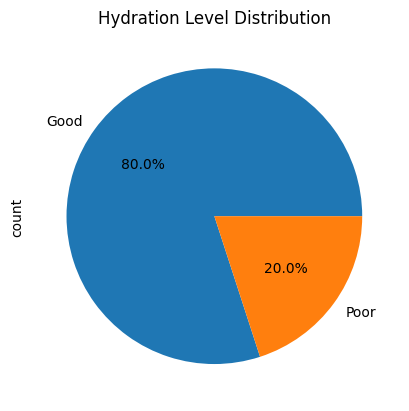

In [12]:
water['Hydration Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Hydration Level Distribution')
plt.show()

In [13]:
water.head(2)

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good


In [14]:
water['Physical Activity Level'].value_counts()

Physical Activity Level
High        10046
Moderate     9860
Low          9756
Name: count, dtype: int64

In [15]:
water['Weather'].value_counts()

Weather
Hot       10053
Normal     9811
Cold       9798
Name: count, dtype: int64

In [16]:
corr_r = water.corr(numeric_only=True)


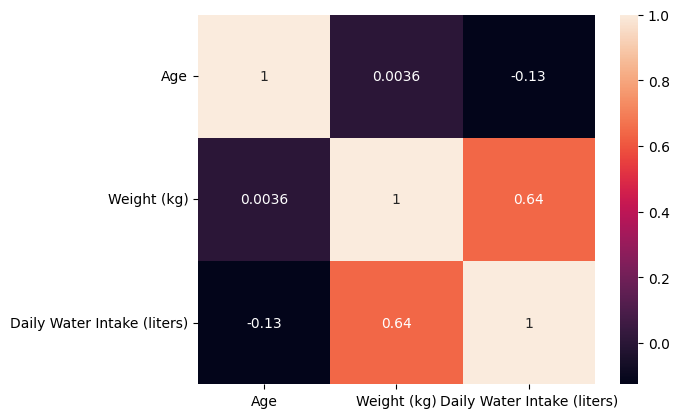

In [17]:
sns.heatmap(data=corr_r, annot=True)
plt.show()

In [18]:
x = water.drop('Hydration Level', axis=1)
y = water['Hydration Level']

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

In [20]:
lable = LabelEncoder()
y = lable.fit_transform(y)

In [21]:
from sklearn.compose import ColumnTransformer


In [22]:
cat_feature = ["Physical Activity Level","Weather"]
ord_feature = ["Gender"]
scaler = ['Age','Weight (kg)', "Daily Water Intake (liters)" ]

ct = ColumnTransformer(transformers=[
                        ('OneHotEncod' , OneHotEncoder(handle_unknown='ignore'), cat_feature),
                        ('Ord', OrdinalEncoder(categories=[['Male', 'Female']]), ord_feature),
                        ('Scaler', StandardScaler(),scaler)],remainder="drop"
                      )

In [23]:
ct

,transformers,"[('OneHotEncod', ...), ('Ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.3, random_state=42) 

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Lr' : LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42),
    'DT' : DecisionTreeClassifier(class_weight='balanced'),
    'RF' : RandomForestClassifier(),
    "XGB" : XGBClassifier()

}

In [27]:
for name,model in models.items():
    pipe = Pipeline([('preprocess', ct),
                     ('model', model)])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    print(name, 'Accuracy score', accuracy_score(y_test, y_pred))
    print(name, 'confusion matrix', confusion_matrix(y_test, y_pred))
    print(name, 'ClFS', classification_report(y_test, y_pred))
    print('\n')
    train_acc = pipe.score(x_train, y_train)
    test_acc = pipe.score(x_test, y_test)

    print("Train Accuracy:", train_acc)
    print("Test Accuracy :", test_acc)


Lr Accuracy score 0.9791465998844153
Lr confusion matrix [[16142   433]
 [    0  4189]]
Lr ClFS               precision    recall  f1-score   support

           0       1.00      0.97      0.99     16575
           1       0.91      1.00      0.95      4189

    accuracy                           0.98     20764
   macro avg       0.95      0.99      0.97     20764
weighted avg       0.98      0.98      0.98     20764



Train Accuracy: 0.9783097325241628
Test Accuracy : 0.9791465998844153
DT Accuracy score 0.978809477942593
DT confusion matrix [[16372   203]
 [  237  3952]]
DT ClFS               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16575
           1       0.95      0.94      0.95      4189

    accuracy                           0.98     20764
   macro avg       0.97      0.97      0.97     20764
weighted avg       0.98      0.98      0.98     20764



Train Accuracy: 1.0
Test Accuracy : 0.978809477942593
RF Accuracy score 0.9793874